# Hotel Reservations 

### Goal 
The method of booking hotels in recent time has greatly shifted to an online space, this in turn has drastrically changed consumer behaviours. As bookings are more online now, cancelling reservations is prevalent in the hospitality industry. A plethora of reasons such as evolving plans and scheduling issues could be seen at the forefront of these cancellations.

To avoid the significant revenue loss, reduce cancellation rates and raise company profits, it is essential to these predict cancellations and establish rigid cancellation policies and strategies.

Using Machine Learning and Data science it is possible to predict these cancellations, supervised and Unsipervised methods would be applicable depending on the situation and structure of the data, hence we must explore the data next to discuss what modeling methods would be best.


### Importing libraries

For this project the following libraries are necessary for exploring the data and predicting on it.

- Pandas: A popular library used for data analysis and manipulation of structured data, as well as preparing and transforming it
- Numpy: A statistical library for numerical operations in python
- Seaborn: A data visualization library built on top of the matplotlib library for attractive and efficient data visualization
- Matplotlib: The most common data visualization library, offering a wide range of data visualization and customization of graphs.
- Plotly: An interactive data visualization library for creating top quality visualizaiton and dashboards.
- Scikit-learn:  Machine learning library for performing statistical analysis, as well as supervised and unsupervised learning methods.

In [55]:
# Exploration libraries
import pandas as pd
import numpy as np 

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Importing Plotly for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import missingno as ms

import datetime as dt



# For preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder


### About the Dataset

#### Acquisition of the Data 

In this analysis, I will be looking to predict the cancellations for a single hotel. Although hotel booking data can be publicly available or scrapped from websites through differenct sources and organizations(e.g travel agencises, research institutions and government bodies). These are more general and aggregated datasources. For this analysis we would need the ***hotel booking data pertaining to the customer***. 

Acquisition of this data is significatly more challenging due to privacy and compliance issues. Some companies might provide access to limited datasets for education or research purposes and these can be accessed using APIs. However, the acquision of this data would typically come with agreements, regulations and sometimes even fees.

Data could also be acquired by going directly to the business and negotiating the release of this information for the purpose of analysis. However, this is unlikely if you are not an employee or contractor of this business due the the confidential nature of the data.

Another means of data acquisition is through data-sharing platforms and open source data platforms(e.g kaggle, Data world, data.gov) This data is usually free and open to the public for analysis. We must be very careful when using this data for several reasons.

- Quality and coverage: Data quality can vary and coverage could be limited depending on the industry.
- Privacy and security concerns: Concerns may exist regaring the sensitivity of the information being handled
- Support and Maintanace: The data set may be ancient and unsupported for a period of time.
- Data Consistency and integrity: Data may lack consistency and be incomplete
- Legal and Compliance risks - Data could have licensing constraints
- Contributor Dependent - The data must be consistently supported by the contributor to ensure it is reliable and updated.

In the project we will be making use of an open source dataset from kaggle. This dataset addresses our concerns as it was updated as recently as april this year, has no legal constraints, is validated on the kaggle platform and it pertains to a single hotel which is the scope of this analysis.



### Data Cleaning and Preprocessing

Data Cleaning and preporcessing are cruscial steps in data analysis and machine learning for several reasons.

- Handling Missing Values
- Removing reducndancy and Noise
- Standardization and Normalization 
- Ensuring smoother analysis
- Ensuring data quality and improving model performance
- Combatting overfitting and underfitting

Having clean and processed data sets you up for reliable, efficient and accurate analysis. It also ensures the data is a for suitable for the desired ML model as well as helps decide the model that would be good for the data. For our dataset, we will be looking at the several preprocessing steps to target the issues listen above.

In [56]:
# importing the data
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [57]:
# Shape and descriptive statisitics of the data
print(df.shape)

(36275, 19)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Handling Nulls, Duplicates and Outliers 

There are 0 duplicates, hence there is no need to drop duplicates.


<AxesSubplot:>

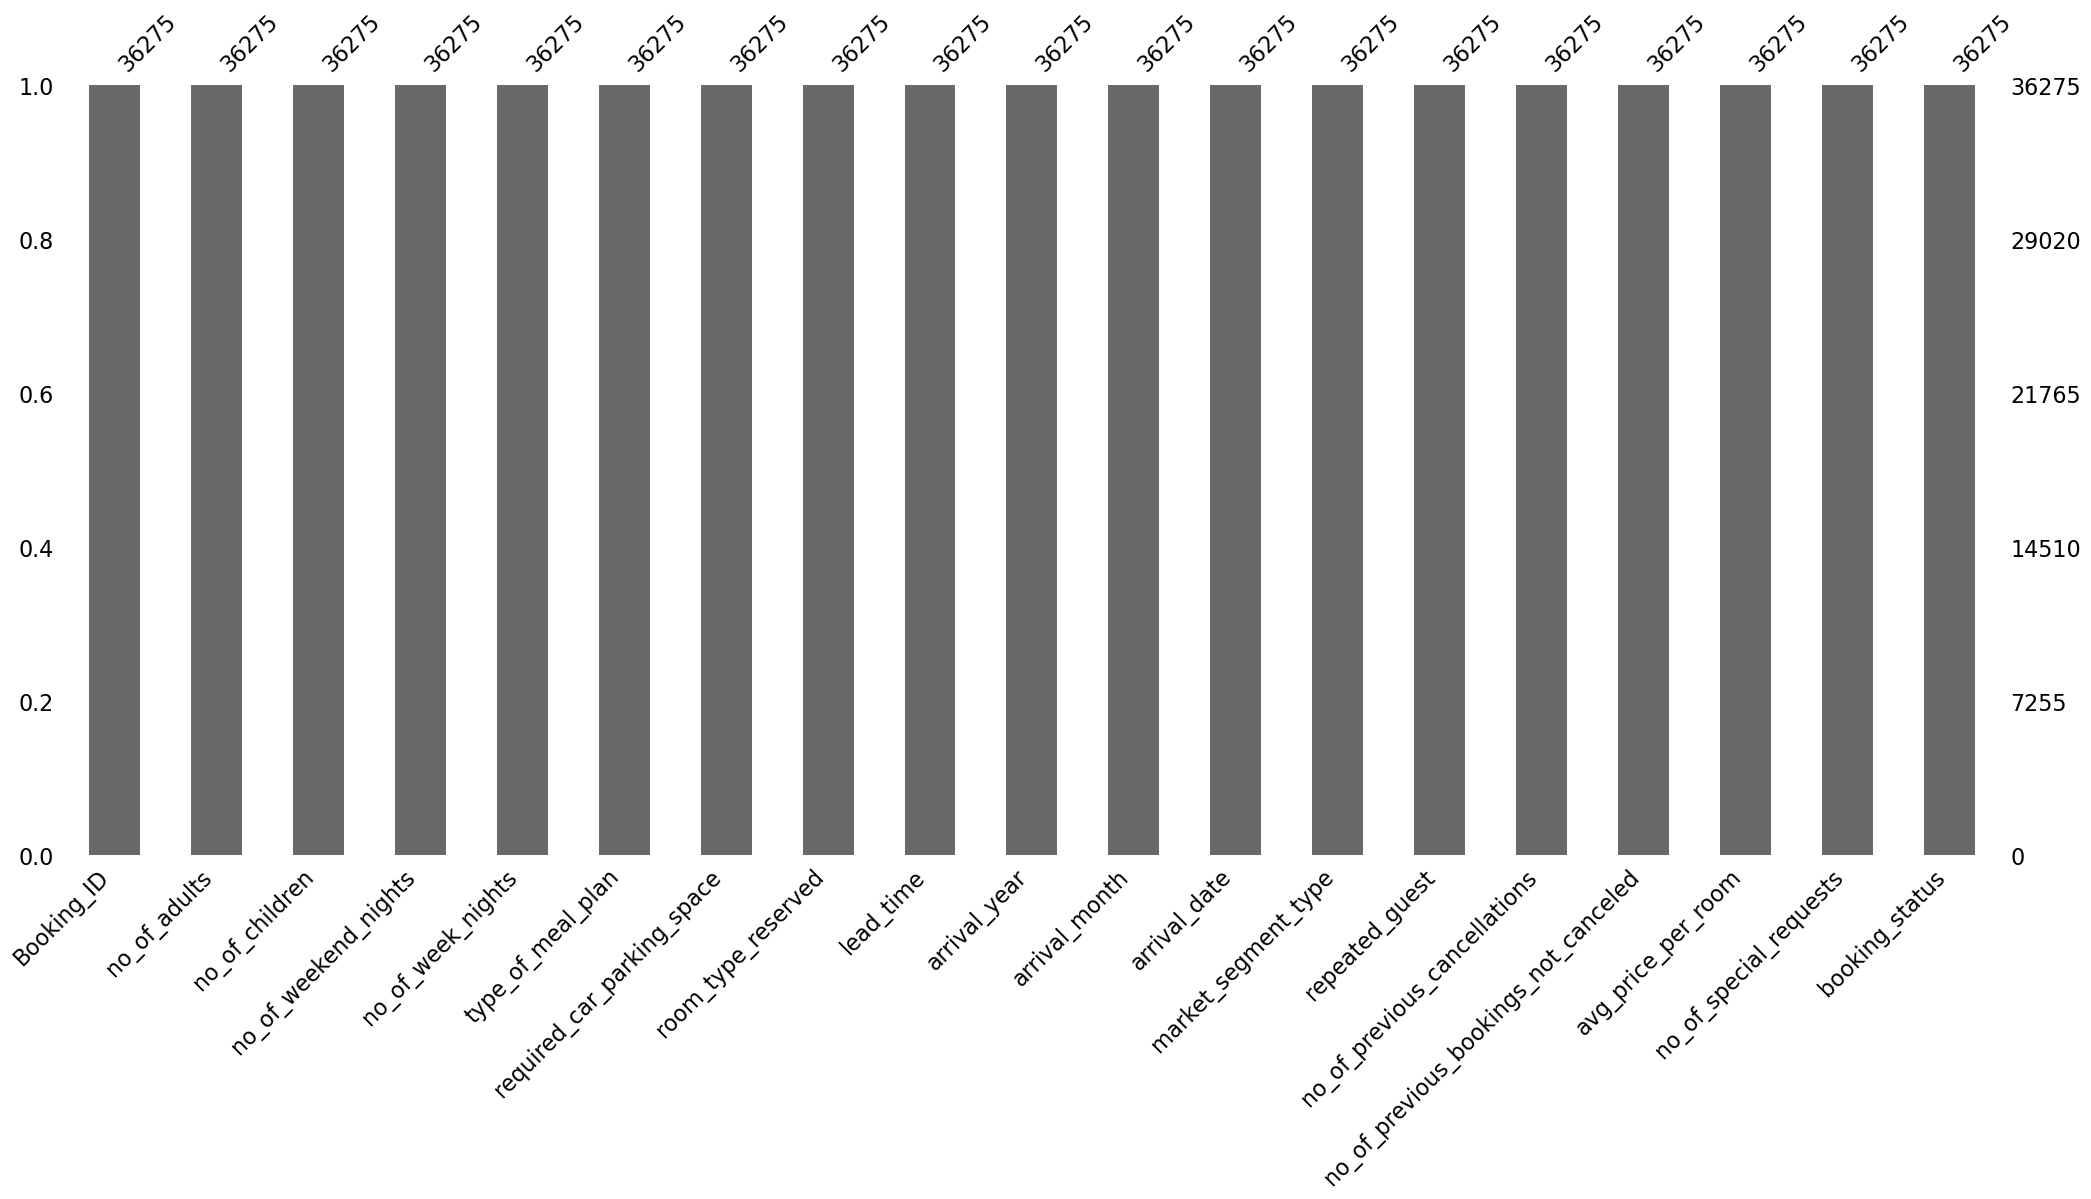

In [59]:
# Let us check for missing rows and duplicated data
print(f'There are {df.duplicated().sum()} duplicates, hence there is no need to drop duplicates.')
# Check for NULLS 
ms.bar(df)

In [60]:
# looking into outliers
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Lead time appears to have the strongest negative correlation in the series sox

### Findings and Conclusions

**Descriptive stats and shape**

Using the shape, describe and info method we are able to discover descriptive statistics about our data. The dataset contain 36725 rows, 19 columns, as well as several descriptive stats for numerical data like mean, median, mode and std.

The data contains no missing data in the dataset, all 36725 rows are present for each columns. Data will not be impute or dropped from the data set as it is complete and structured. It is important to note that data will not always be in a clean format as we have, hence the methods such as imputing, droping, or filling the data would need to be considered in future iterations.


**Datatypes**

The datatypes present vary between object and int64, float64. These represent text, numerical and decimal data. 
We can also convert our categorical columns like booking status to numericals using the astype method. It is important as that is the column that we will be predicting later on and ML models can only understand numbers and not texts. This process can be done using Sklearns LabelEncoder Library when it is time to build our model.

**Correlations**

It would be difficult to draw an insightful conclusions from the heatmap, however, the values appear to not having any strong correlations with each other or with out target variable.

<AxesSubplot:>

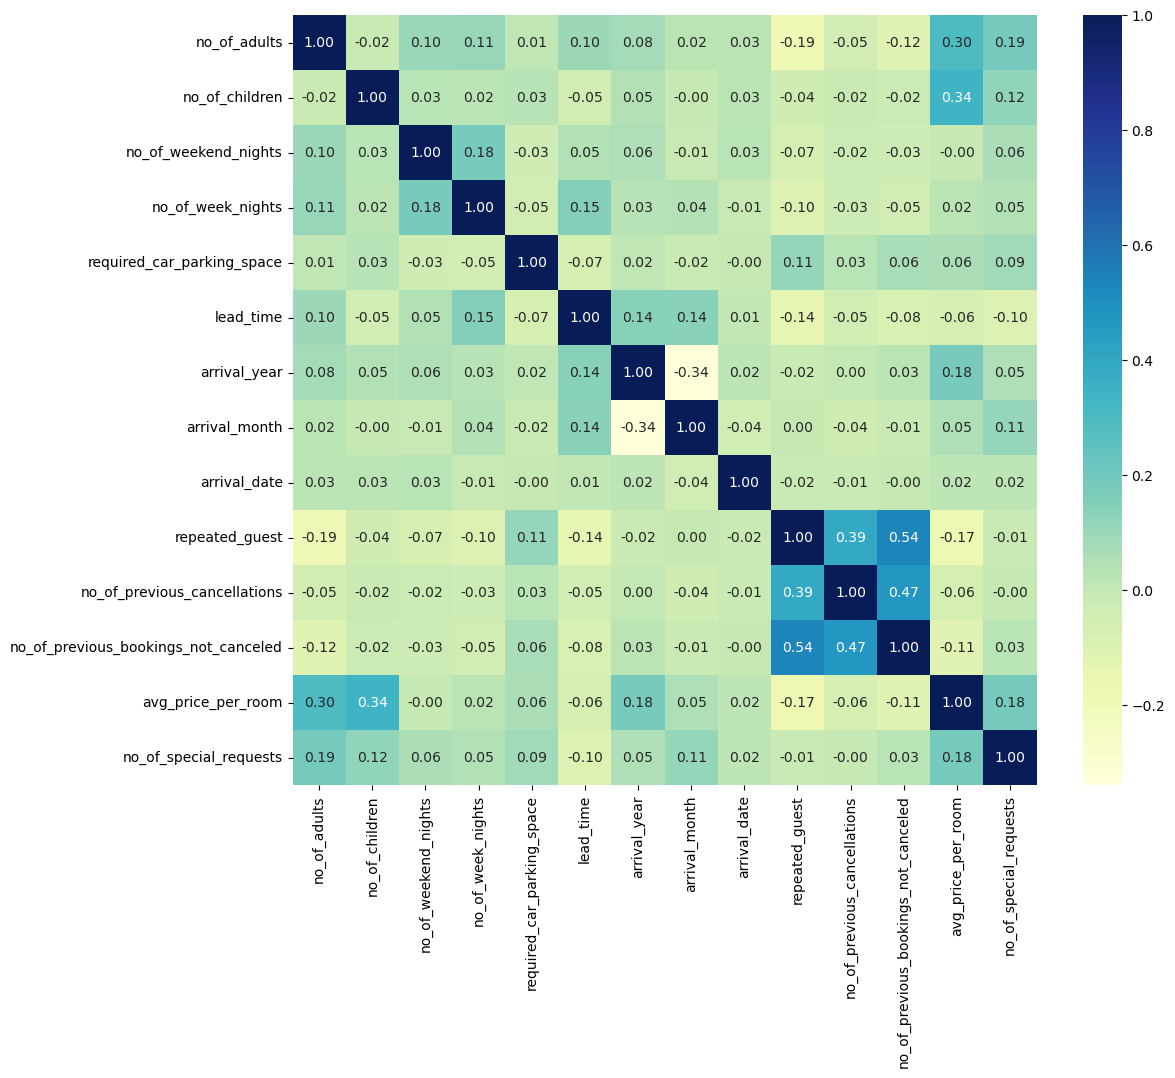

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

### Data Visualizations 

Data visualization is the act of transforming information into visual formats, such as graphs and charts, to make it easier for humans to ingest, understand and derive insights. The primary objective is to make it simpler to identify trends patterns, commons and outliers in large chunks of data. It is one of the key steps in exploring our data as we can learn more about the data that will be very useful when building our model.

The graphs below visualize several numerical and categorical columns in our data, using bar and pie charts. With this am trying to understand how these features relate to the our target column 'booking_status'.

The overall objective of this EDA is to see what factors and features affect booking status affect booking status and give good recommendations based on the analytics


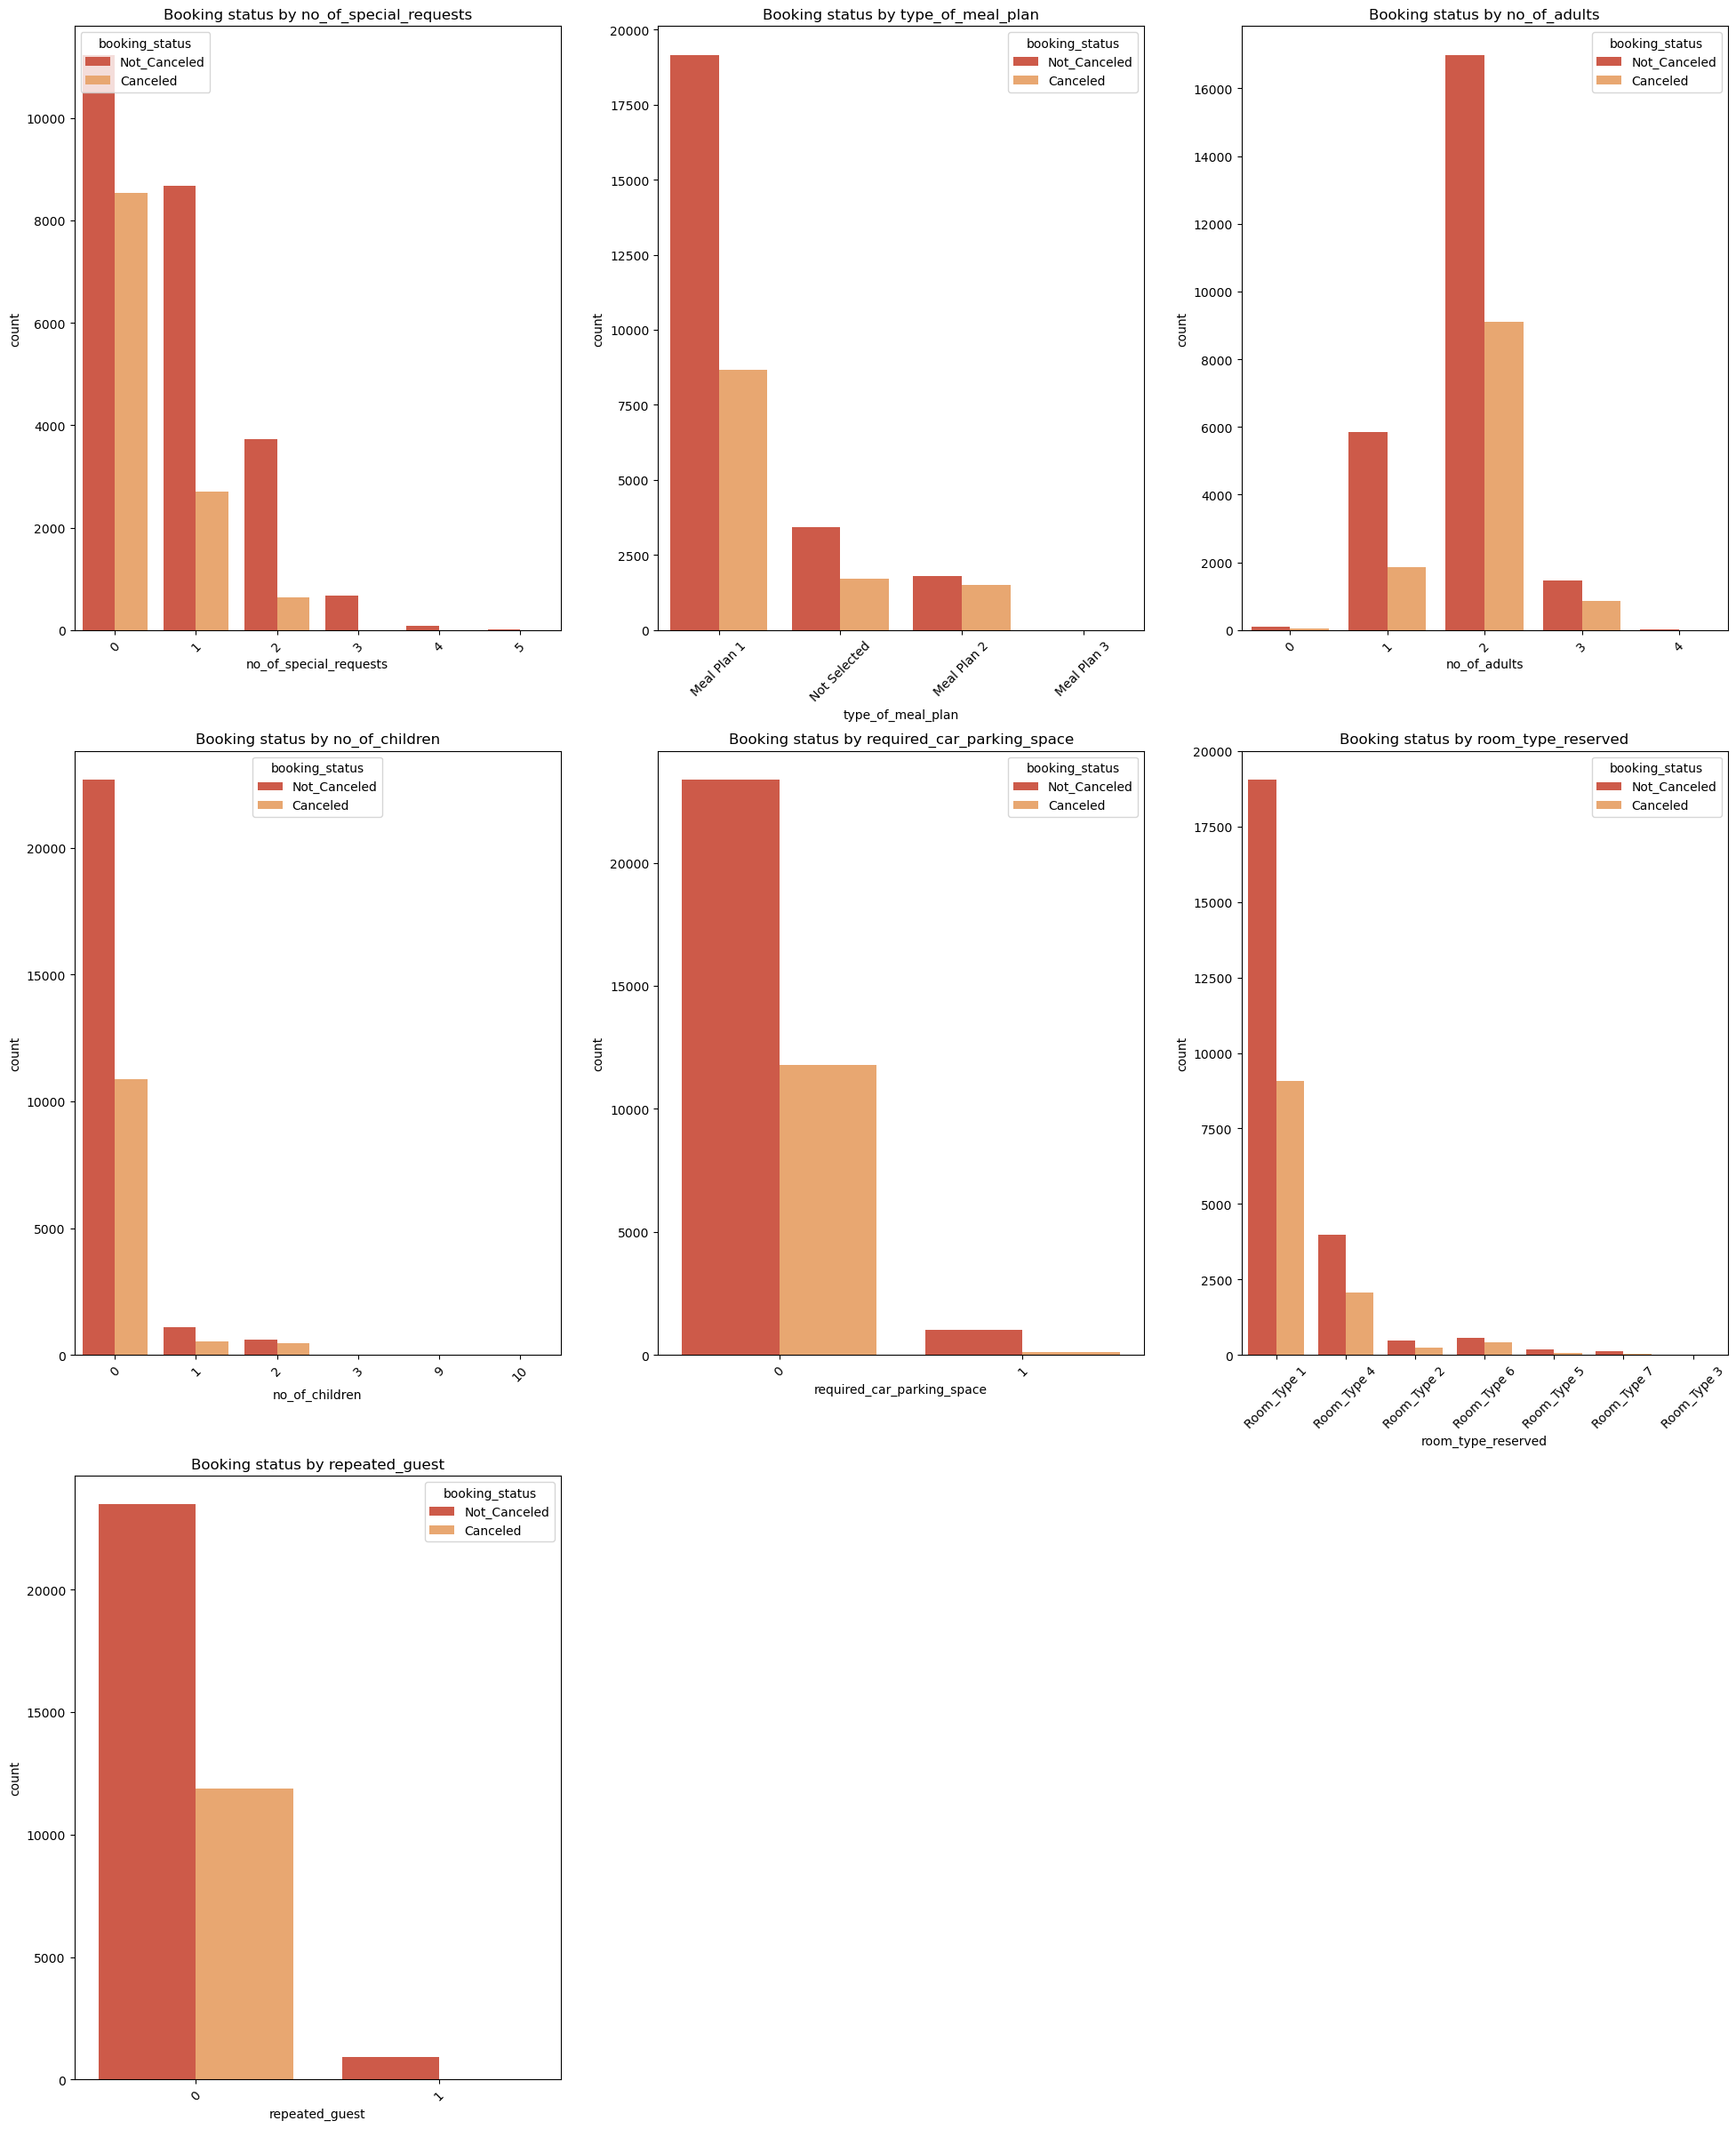

In [62]:
num_subplots = 7

rows = 3
cols = 3



fig, axes = plt.subplots(rows, cols, figsize = (24,30))
cats = ['no_of_special_requests','type_of_meal_plan', 'no_of_adults','no_of_children','required_car_parking_space', 'room_type_reserved'
       ,'repeated_guest']
axes = axes.flatten()
axes[7].remove()
axes[8].remove()




sns.set_palette('RdYlBu')
for i in range(num_subplots):
    plot = sns.countplot(data = df, x = cats[i], ax = axes[i], hue = df['booking_status'])
    plot.set(title = f'Booking status by {cats[i]}')
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)


#### Insights and Recommendations

From the plot above we can see that cancelation status is affected by other factors in several ways.

* **Meal Plan** -  Most customers have selected meal plan 1 over the others and not selecting a meal plan. Furthermore the greatest difference between cancelled and retained bookings is in meal plan one, while other meal plans have relatively close numbers for cancelled and retained bookings. This could mean the hotel should focus more on pushing meal plan 1.

* **Children** - Most customers come in without children and cancellation is more prevalent then, however, when they come with children, there is a higher cancelation ratio. The hotel should aim for bookings without children.

* **Room Type** - Room Type 1 witnessed the highest intake of customers, with other rooms having relatively small counts overall, although it has a high cancellation rate as well, it is worth noting that the company could focus on rooms such as these with high booking rates.

* **Required car parking space** - Most customers do not reserve parking spaces.

* **Adults** - When it is a single adult the cancelation rate is typically less, however most common type of bookings is for two adults. This typically results in the most amount of cancelations. The hotel can aim for single bookings as they have fewer cancellations

* **Special Requests** - The more the special requests, the less the cancelation rate, given that the hotel is able to fulfil a specific customer request, this would lead to customer satisfaction and a lower cancellation rate. 

* **Repeated Guest** - Taking on repeated guest has a significantly lower cancellation rate, and the hotel should encourage campaigns to retain previous guests. The hotel should look to implement strategies that would grow thier relationship with customers since repeated guests hardly cancel.



## EDA

### Total Bookings Per Market Segment

In [63]:
# sns.countplot(data = df, x = 'market_segment_type', hue = 'booking_status')
fig = px.histogram(df, x="market_segment_type", color="booking_status", barmode = 'group')
fig.show()

#### Insights 

Based on the market_segment_type column it is clear that most of the bookings were made online, with those accounting for 23,214 or 64% of all bookings, while offline accounts for about 10,528 or 29%, with the remaining being space between corporate, complementary and avaiation at 5.56%, 1.08% and 0.345% respectively.

This tells us about how the data could be strategically used in marketing and sales opportunities for the company. It could effectively contribute to targetting, advertising and promotional strategies. It shows opportunity to gain and control different markets.

### Cancellation by room type

## Time based visualizations

The objective of these visualizations is to see how these booking status varies based on different time periods.
In this section I aim to see how lead time, weekend, weekdays, months and year bookings vary.

Text(0, 0.5, 'Count')

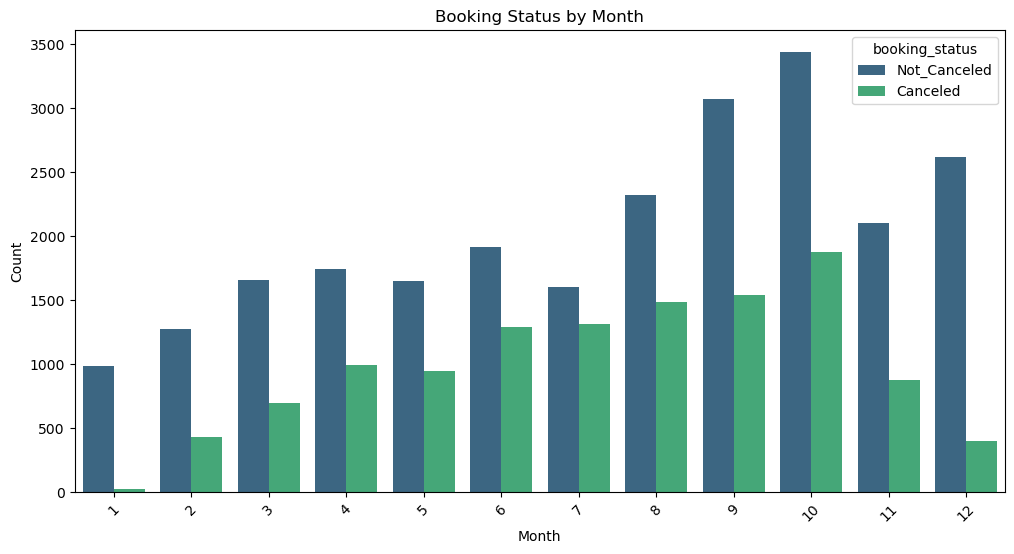

In [64]:
# Cancelled vs Retained Monthly Bookings
plt.figure(figsize = (12,6))
sns.countplot(x = 'arrival_month', hue = 'booking_status', data = df, palette = 'viridis')
plt.title('Booking Status by Month')
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Count')

In [65]:
fig = px.histogram(df, x = df['arrival_year'], color = 'booking_status', 
                   barmode = 'group', width = 700, height = 500, title = 'Year against Booking status')
fig.show()

### Cancellation by lead time

In [66]:
bins = pd.cut(df.lead_time, bins = [0,30,60,90,120,150,180,210,240,270,365,np.inf])
lt = pd.crosstab(index = df.booking_status, columns = bins)

In [67]:
labels= ['1 Days','30 Days','60 Days','90 Days','120 Days', '150 Days'
              ,'180 Days' ,'210 Days' ,'240 Days', '270 Days', '300 Days+']
lt.columns = labels

lt

,1 Days,30 Days,60 Days,90 Days,120 Days,150 Days,180 Days,210 Days,240 Days,270 Days,300 Days+
booking_status,,,,,,,,,,,
Canceled,1695,1480,1253,1401,773,1316,1049,625,697,1297,231
Not_Canceled,9419,4827,3255,2097,1497,688,471,277,246,372,12


Text(0.5, 1.0, 'Cancellation by lead time')

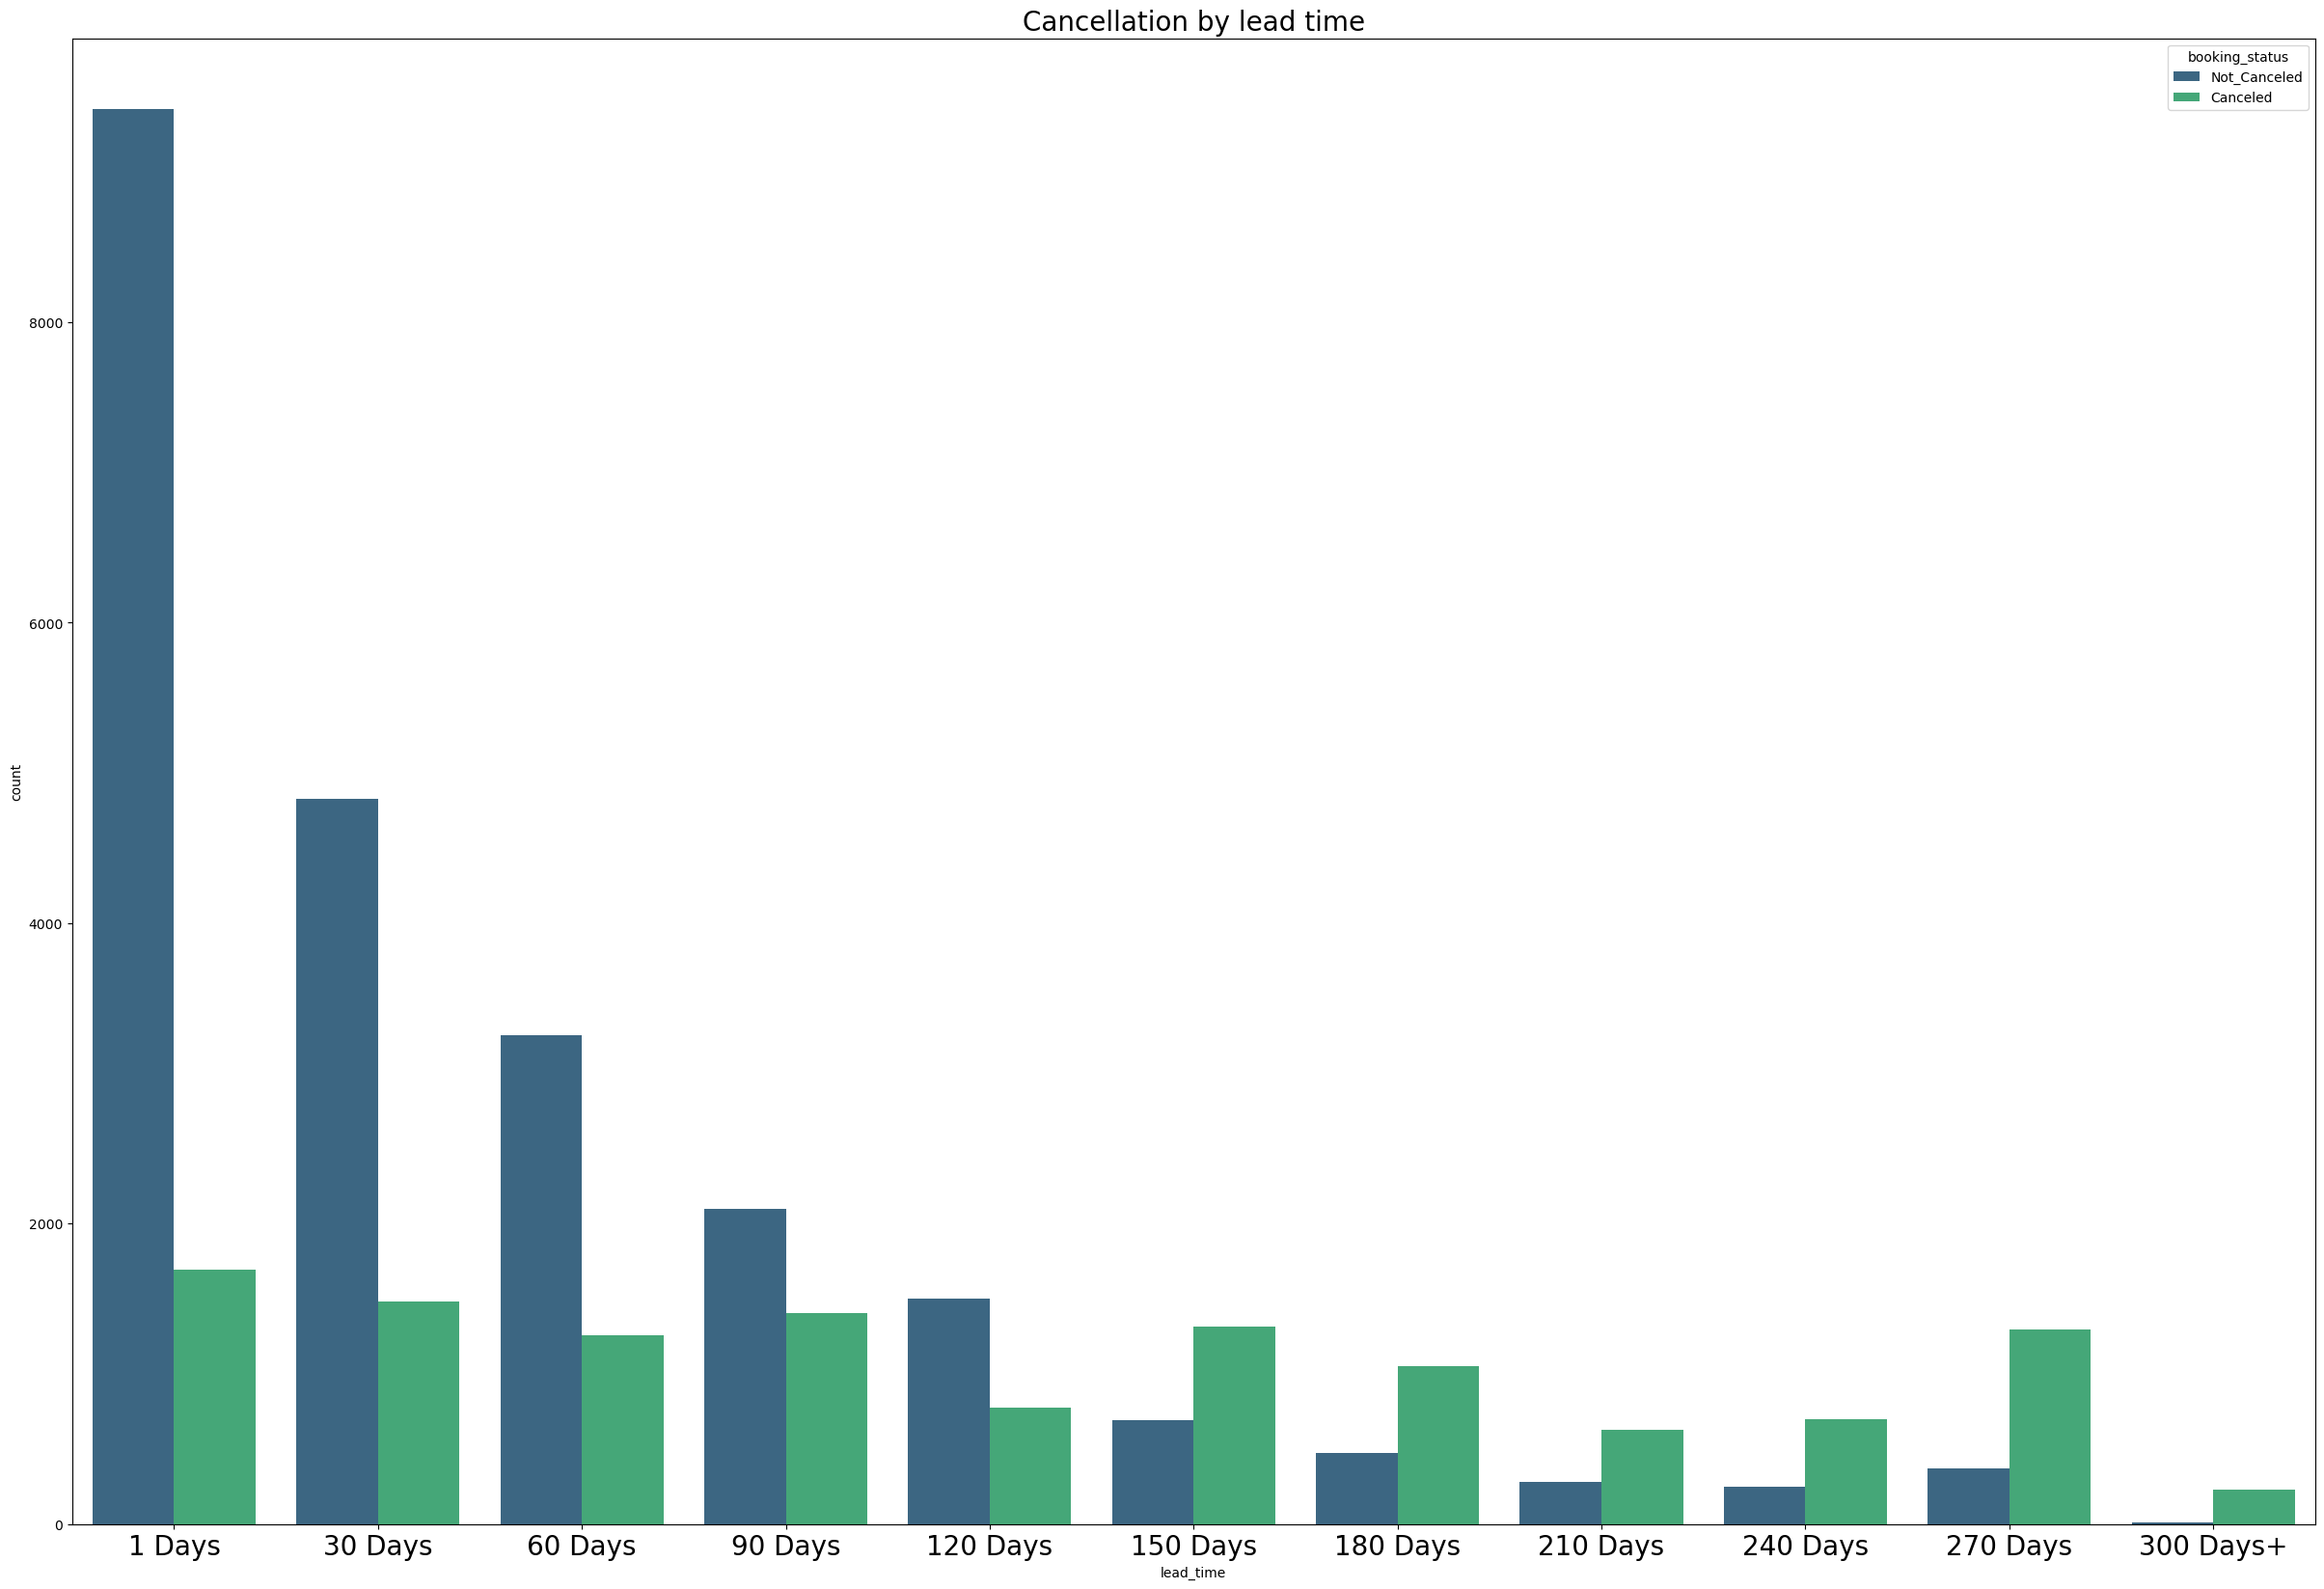

In [68]:
plt.figure(figsize = (30,20))
fig = sns.countplot(data = df, x = bins,  hue = 'booking_status', palette = 'viridis')
fig.set_xticklabels(labels,fontsize = 20)
fig.set_title('Cancellation by lead time', fontsize = 20)

### Weekdays vs Weekend Cancellation

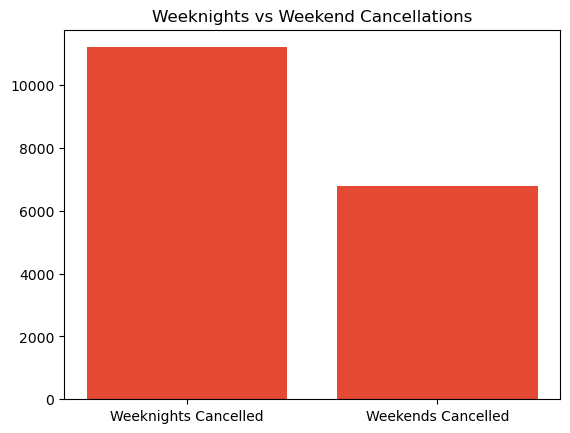

In [69]:
# weeknights = df[['no_of_week_nights']df['no_of_week_nights']>0][df['booking_status']== 'Canceled'].sum()
weeknights = len(df[(df['no_of_week_nights']>0) & (df['booking_status']== 'Canceled')])
weekend_nights = len(df[(df['no_of_weekend_nights']>0) & (df['booking_status']== 'Canceled')])
wkn = [weeknights, weekend_nights]
cols = ['Weeknights Cancelled', 'Weekends Cancelled']  

# Create the bar plot using Matplotlib
plt.title("Weeknights vs Weekend Cancellations")
plt.bar(cols, wkn)  # Switched order for bar plot (labels on x-axis, data on y-axis)
plt.show()

#### Insights and Recommendations 
Weeknights and weekend bookings seem to be related to cancellations, from this we can tell that a large number of weeknight bookings are cancelled and less weekend bookings are cancelled, it may be wise to make an additional column that tells us if a booking is a weekend or weeknight booking from this insight.

In [70]:
# It would be wise to make a column representing whether a booking falls on a weekday or weekend

dates = df[['arrival_year','arrival_month', 'arrival_date']]
dates.columns = ['year','month', 'day']
dates = pd.to_datetime(dates, errors= 'coerce')
df['is_weekend'] = dates.dt.day_name().map(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
df['is_weekend']



0        0
1        0
2        0
3        1
4        0
        ..
36270    0
36271    0
36272    1
36273    1
36274    1
Name: is_weekend, Length: 36275, dtype: int64

Text(0.5, 1.0, 'Booking Status Across Price and Arrival Month')

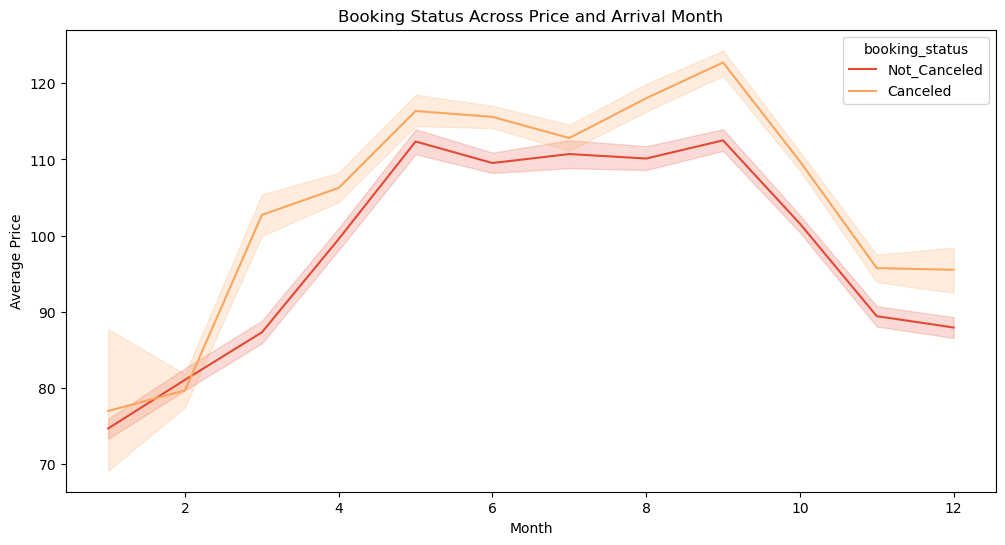

In [71]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = 'arrival_month', y = 'avg_price_per_room', hue = 'booking_status' )
plt.xlabel("Month")
plt.ylabel('Average Price')
plt.title("Booking Status Across Price and Arrival Month")


<AxesSubplot:xlabel='avg_price_per_room', ylabel='count'>

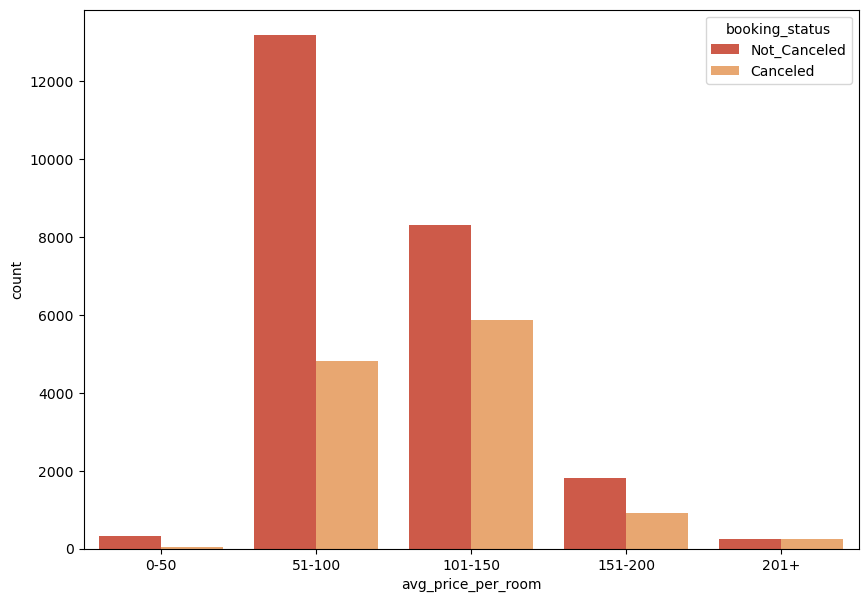

In [72]:
plt.figure(figsize=(10,7))
labels = ['0-50','51-100', '101-150','151-200', '201+']
sns.countplot(data = df, x=pd.cut(df['avg_price_per_room'], bins = [0,50,100,150,200,np.inf], labels = labels),
              hue = 'booking_status')

**Insights and Recommendations** 

This analysis reveals numerous factors affecting cancellations, including lead time, arrival month and pricing. These columns seem to affect booking status heavily and i suspect they would rank high in the model we use to predict.


From the cross tabulation, it looks like bookings made earlier tend to have lower cancellation rates, This especially prevalent for bookings made 150 days in advanced or more. At this point it is rare that these bookings are followed through. Furthermore, it is evident that trips booked for weekends, have lower chances of cancellation as opposed to trips booked on weekdays.

The busiest months in the hotel are between september and October, with the highest number of arrivals. However, they also come with the greatest cancellation periods. From the analysis we can tell that the hotel also increases their prices during this peak periods in order to capitalize on it. 

Most of the bookings fall between the range of 51-150, with most cancellations coming around the 101-150 USD mark. Although it is worth noting that bookings rose as well as cancellation. The hotel also increase their prices to the 101-150 mark during peak periods(SEPT, OCT), which is the price range with the most cancellations, this can seen with the uptick in cancellations during that period. 

The company should provide incentives for booking with shorter lead times, and have stricter cancellation policies when lead times are longer, as well as adjust pricing strategies and promos during peak periods, to ensure cancellations are minimal.



# Algorithms

Taking into consideration the business problem, objective and information learned from the data, the best algorithm to apply would be a supervised learning algorithm, particulary a classification algorithm.

Supervised learning algorithms are powerful machine learning techniques for predicting and understanding the relationship between and input and output. We refer to the inputs as features and the output as target variable. The process of the learning the relationship between the target and feature variables is referred to as Training. 

There are two types of supervised learning algorithms Classification and Regression algorithms.

Classification - These algorithms are used to predict discrete outcomes, most popular being binary classification between two classes, however, when there are multiple classes involved we refer to this as  Multiclass Classificaition. Notabel Classification algorithms are Logicsitic Regressions, Decision Tree Classifier, KNN Classifier, Random Forest Classifier, XGBoost.

Regression - These algorithms are used to predict continues outcomes like prices or sales. Some popular algorithms are Linear Regression, Decision Tree Classifier, KNN Regressor, Random forest Regressor.

#### Use Case

For the purpose of this project, we would make use of a classification algorithm. We would make use of the 'BOOKING_STATUS' column as out target column and other columns as our features. It would be a binary classification algorithm as it is only two classes we are predicting for. Although we would need to ensure that we are picking the best model for classification. Idealy logistic regression is the most common binary classification algorithm, but others like decision tress classifier and KNN classifer could yield good results. Hence, we will ensure we test multiple models and tune their parameters in order to get the best results.

The predictive capabilies of these algorithms allows businesses to optimize their operations and resources. By accurately predicting booking statuses a hotel can streamline their servicesm allocate resouces efficiently, forecast demand, enhance strategies and improve customer satisfaction.

#### Model Validation and metrics

After selecting the models we will be predicting with there is a need to tune the parameters. Tuning would lead to better model performance and more suitable metrics. Some key steps I will take when tuning are the following.

* **Splitting into training and test set** - This reduces overfitting and underfitting
* **Cross Validation** - Dividing the dataset into subtests and performing training and testing to get better metrics results
* **Grid Search and HyperParmater Tuning** - Grid Search with cross validation helps find the bet parameters to set our model on.
* **Confusion matrix and metrics** -  Calculating metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC) using a confusion matrix helps in assessing the model's performance.
* **Validation Curves and Learning Curves** - They help in understanding how the model's performance changes with different parameters or data sizes.

In conclusion, the use of supervised learning algorithms, particularly a classification algorithm offers a data driven approach to decision making that leverages the hotels historical data to foster operational efficiency.


## Machine Learning Model

### ML Preprocessing and feature engineering

In [73]:
#Importing Machine Learning Classification libraries and Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix,recall_score,f1_score, roc_auc_score, RocCurveDisplay,roc_curve, classification_report
from sklearn.feature_selection import RFE


### Converting Categoricals

As part of our preprocessing and feature engineering for machine learning, the first hing we must do is ensure all our data is in suitable formats. Our categoricals must be converted to numerical values because ML models only understand numbers.
There are a numerous python libraries such as OneHotEncoder, LabelEncoder or even Pandas functions(replace or dummy columns) that would be suitable for this. However, the most common is the LabelEncoder() function from SKlearn and we shall be using that for this.

From the data exploration we will be converting the following columns (type_of_meal_plan, room_type_reserved, market_segment_type) as well as our target column booking_status


### Feature Scaling

We most also scales are features as they have significanlty different scales, which hinders optimization of the modeling process. In our dataset, Lead time and Avg price have large values so scaling the features would be required here.We will make use of the StandardScaler Library to achieve this.

In [74]:
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)
print('Our categorical columns have been converted to numbers so our model may understand')
df[cols].head()

Our categorical columns have been converted to numbers so our model may understand


,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,0,0,3,1
1,3,0,4,1
2,0,0,4,0
3,0,0,4,0
4,3,0,4,0


The next step in our ML process is to pick our target and feature columns. Since we are trying to predict the likely hood of a cancellation, booking_status would serve as our target column.
We will also be dropping feature columns that are of no significance to our model, that is 'booking_id'

### Picking target and Feature Columns

In [75]:
X = df.drop(columns = ['booking_status', 'Booking_ID'], axis = 1) # feature variables
y = df['booking_status'] # target variable

### Building training and testing sets

Before we begin our ML, there is a need to split our data in training and testing set. Splitting data trains our model on a subset of the data known as the training set to  prevent overfitting(_model memorizes data patterns and fails on unseen data_).The testing set evaluates our models ability to generalize and perform well on entirely ne, unseen data. This ensures a robust model that works in multiple scenarios.



In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 42)
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((27206, 18), (27206,)), ((9069, 18), (9069,)))

### Scaling our features

In [77]:
scaler = StandardScaler()
# Transforming training and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### What Classification Models will we be using and why?

We already determined that we will be making use of supervised classification algorithms, and for this project this project we will be making use of.

* **Logistic Regression** - Imagine a linear line between booking status that are cancelled and not cancelled, Logisitc Refression model find this line by calculating the probability of canceelation based on a combination of all the features in our model. It is good as it is easy to understand and shows us the feature importance, however, it assumes a linear relation between features and target, which may not always be true. It works great for binary classification issues like we are taking on.


* **Random Forest Classifier** - A random forest is a collection of decision trees, each trained on a random subset of features and datapoints, with the majority vote on cancellations becoming the final prediction, this is better for identifying complex patterns that could be missed in linear regression. We can also leverage the RFE library in sklearn to select the best performing features for our model.





### How will we be evaluating the model

For this classification model, we will be making use of several evaluation methods and techniques
 
* **Accuracy**: The proportion of correct predictions(true positives + true negatives)/Total Predictions, this is a commonly used classification metric and tells us how well our model predicted
* **Precision**: The proportion of true positives among all predicted positives(true positive / true positive + false_positive)
* **Recall**: The proporition of true positives among all actual positives (true positive / true positive + false negative)
* **F1 Score**: The F1 score is calculated by taking the harmonic mean of precision and recall. The harmonic mean is a type of average that gives more weight to lower values.
* **AUC-ROC**: This is a plot that illustrates the models ability to differentiate between classes, a higher AUC indicates better performance 

We will be getting these metrics from the Sklearn Metrics and will be able to get them all using the classification report library.

## Logistic Regression

In [78]:
from sklearn.metrics import roc_auc_score

In [82]:
# Modelling function 

def model(model, param_grid, scoring, cv, X_train, X_test, y_train):
    mod = GridSearchCV(model, param_grid = param_grid, scoring = 'roc_auc', cv = cv)
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    y_pred_proba = mod.predict_proba(X_test_scaled)[:,1]
    print('Best Hyper Parameters; ', mod.best_params_)
    print('Best Score: ', mod.best_score_)
    return y_pred,y_pred_proba

    


# Building a plotting function for the area under the curve

def display_roc_curve(y_pred_proba, roc_auc, estimator_name):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = estimator_name).plot()
    roc_display.figure_.set_size_inches(5,4)
    plt.plot([0,1],[0,1], color = 'g')
    
    
# plotting the roc_curve
def roc_plot(y_test, y_pred, y_pred_proba, estimator_name ):
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    display_roc_curve(y_pred_proba, roc_auc = roc_auc, estimator_name = estimator_name)
    report = classification_report(y_test, y_pred)
    print('ROC AUC SCORE', roc_auc)
    print('Accuracy', accuracy)
    print(report)
    


    
    


In [80]:
# First we must create a dictionary of all the hyperparameters we plan to adjust for using the grid search cv
param_grid = {
    'C': [0.1,1,10,1000],
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga','lbfgs']    
}
predictions = model(model = LogisticRegression(max_iter=1000)
                     , param_grid = param_grid, scoring = 'roc_auc', cv = 10
                    ,X_train = X_train_scaled, X_test = X_test_scaled, y_train = y_train)

lr_y_pred = predictions[0]
lr_y_pred_proba = predictions[1]



Best Hyper Parameters;  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.8560426827021308


/Users/munachimso/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


40 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/munachimso/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/munachimso/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/munachimso/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

### Evaluation of the model

The results show a decent performance for the logistic refression model, 

ROC AUC SCORE 0.857226394361012
Accuracy 0.8054912338736354
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      3026
           1       0.82      0.90      0.86      6043

    accuracy                           0.81      9069
   macro avg       0.79      0.76      0.77      9069
weighted avg       0.80      0.81      0.80      9069



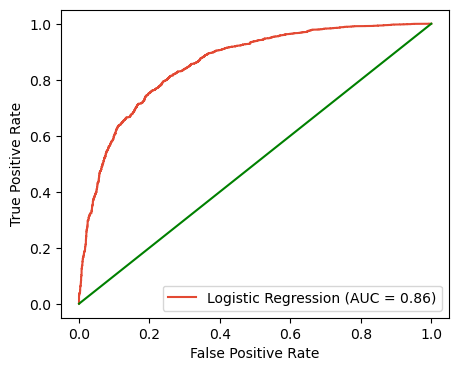

In [83]:
roc_plot(y_test = y_test, y_pred = lr_y_pred, y_pred_proba = lr_y_pred_proba, estimator_name = 'Logistic Regression')

The model performs decently(AUC_ROC: 0.806, Accuracy: 0.81). Class 1 also has a higher recall(90%) than class 0(62%). There's a trade off however between precision and recall. 
Our model is mostly reliable with good accuracy(0.81), but we can improve on this, particularly in class 0.

### Random Forest Classifier 

In [84]:
# Getting the top 10 features to use
rfe = RFE(RandomForestClassifier(), n_features_to_select = 10)
rfe_features = rfe.fit(X_train_scaled, y_train)
rfe_features_selected = rfe_features.support_

#Saving the top features to a df
X_train_rfe = rfe.transform(X_train_scaled)

param_grid = {'n_estimators': [25,50,100],
             'max_depth': [3,5,10,15]
             }


In [85]:
predictions = model(model = RandomForestClassifier()
                     , param_grid = param_grid, scoring = 'roc_auc', cv = 10
                    ,X_train = X_train_scaled, X_test = X_test_scaled, y_train = y_train)

rf_y_pred = predictions[0]
rf_y_pred_proba = predictions[1]

Best Hyper Parameters;  {'max_depth': 15, 'n_estimators': 100}
Best Score:  0.9505608548589098


ROC AUC SCORE 0.953446871555789
Accuracy 0.8918293086338075
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      3026
           1       0.90      0.94      0.92      6043

    accuracy                           0.89      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.89      0.89      0.89      9069



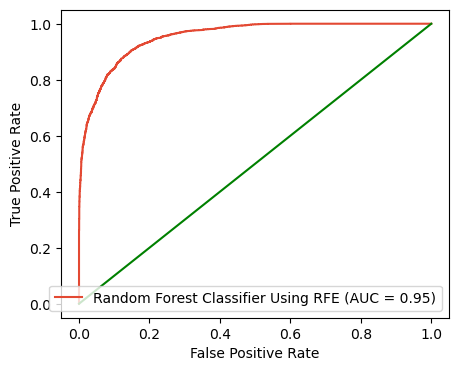

In [86]:
roc_plot(y_test = y_test, y_pred = rf_y_pred, y_pred_proba = rf_y_pred_proba, estimator_name = 'Random Forest Classifier Using RFE')

In [87]:
feature_names = list(X.columns)
ranking = rfe.ranking_
selected_feature_names = [feature_names[i] for i, f in enumerate(ranking) if f]
print("Feature Ranking (Lower is more important):")
for i, rank in enumerate(ranking):
    print(f"\tFeature Name: {selected_feature_names[i]}, Rank: {rank}")

rank = zip(selected_feature_names, ranking)
rank = dict(rank)

Feature Ranking (Lower is more important):
	Feature Name: no_of_adults, Rank: 1
	Feature Name: no_of_children, Rank: 5
	Feature Name: no_of_weekend_nights, Rank: 1
	Feature Name: no_of_week_nights, Rank: 1
	Feature Name: type_of_meal_plan, Rank: 2
	Feature Name: required_car_parking_space, Rank: 6
	Feature Name: room_type_reserved, Rank: 3
	Feature Name: lead_time, Rank: 1
	Feature Name: arrival_year, Rank: 1
	Feature Name: arrival_month, Rank: 1
	Feature Name: arrival_date, Rank: 1
	Feature Name: market_segment_type, Rank: 1
	Feature Name: repeated_guest, Rank: 7
	Feature Name: no_of_previous_cancellations, Rank: 9
	Feature Name: no_of_previous_bookings_not_canceled, Rank: 8
	Feature Name: avg_price_per_room, Rank: 1
	Feature Name: no_of_special_requests, Rank: 1
	Feature Name: is_weekend, Rank: 4


The random forest model shows good overall performance in all metrics when compared to the logistic regression model. It is much better at distinguishing between the two categories and accurately predicts the correct category about 89% of the time, with a precision of 90% for class 1 and 88% for class 0. Overall this model performed alot better than the first.

We are even able to see which columns were used as our ten, the lower the ranking the higher the importance of the feature, hence according to our model the ten best features (in no order). 

1. Lead Time
2. Average Price Per room
3. Number of weekend nights
4. Number of week nights
5. Arrival year
6. Arrival month
7. Arrival Data
8. Market Segment Type
9. Number of adults
10. No of special requests

**Note: As expected from our analytics, **Arrival period, Lead Time, Average Price per room and Market Segment time are important features in prediction.**

Overall the random forest model does a better job in predicting that the logistic regression model, and with this we will be able to predict cancellations, improving business revenue and resources.


| Metric              | Logistic Regression | Random Forst Model |
| :---------------- | :------: | ----: |
| Precion       |   True   | 23.99 |
| Recall           |   True   | 23.99 |
| Accuracy     |  False   | 19.99 |
| F1 Score  |  False   | 42.99 |
| ROC AUC  |  False   | 42.99 |